In [1]:
# import pyspark to process large files and create a new spark session

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, asc, desc, to_timestamp, first, unix_timestamp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession\
    .builder\
    .master('local[*]')\
    .config("spark.driver.memory", "4g")\
    .appName('process_tripdata')\
    .getOrCreate()

21/11/17 13:19:43 WARN Utils: Your hostname, LAPTOP-VD4O2HIL resolves to a loopback address: 127.0.1.1; using 172.24.239.9 instead (on interface eth0)
21/11/17 13:19:43 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/11/17 13:19:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [4]:
# read all months trip data

jan_data = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-01.csv', header=True)

feb_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-02.csv', header=True)
feb_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-02.csv', header=True)

mar_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-03.csv', header=True)
mar_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-03.csv', header=True)

apr_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-04.csv', header=True)
apr_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-04.csv', header=True)

may_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-05.csv', header=True)
may_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-05.csv', header=True)

jun_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-06.csv', header=True)
jun_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-06.csv', header=True)

jul_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-07.csv', header=True)
jul_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-07.csv', header=True)

aug_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-08.csv', header=True)
aug_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-08.csv', header=True)

sep_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-09.csv', header=True)
sep_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-09.csv', header=True)

oct_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-10.csv', header=True)
oct_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-10.csv', header=True)

nov_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-11.csv', header=True)
nov_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-11.csv', header=True)

dec_fhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhv_tripdata_2019-12.csv', header=True)
dec_fhvhv = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/2019/fhvhv_tripdata_2019-12.csv', header=True)

In [5]:
# drop unused columns

jan_data = jan_data\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

feb_fhv = feb_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
feb_fhvhv = feb_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

mar_fhv = mar_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
mar_fhvhv = mar_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

apr_fhv = apr_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
apr_fhvhv = apr_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

may_fhv = may_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
may_fhvhv = may_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

jun_fhv = jun_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
jun_fhvhv = jun_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

jul_fhv = jul_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
jul_fhvhv = jul_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

aug_fhv = aug_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
aug_fhvhv = aug_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

sep_fhv = sep_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
sep_fhvhv = sep_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

oct_fhv = oct_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
oct_fhvhv = oct_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

nov_fhv = nov_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
nov_fhvhv = nov_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

dec_fhv = dec_fhv\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')
dec_fhvhv = dec_fhvhv\
    .drop('hvfhs_license_num')\
    .drop('dispatching_base_num')\
    .drop('SR_Flag')

In [6]:
# sample fhv and fhvhv schemas

feb_fhv.printSchema()
feb_fhvhv.printSchema()

root
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)

root
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)



In [7]:
# cast PO and DO datetime cols to datetime

jan_data = jan_data\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
feb_fhv = feb_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
feb_fhvhv = feb_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
mar_fhv = mar_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
mar_fhvhv = mar_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
apr_fhv = apr_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
apr_fhvhv = apr_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
may_fhv = may_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
may_fhvhv = may_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
jun_fhv = jun_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
jun_fhvhv = jun_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
jul_fhv = jul_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
jul_fhvhv = jul_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
aug_fhv = aug_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
aug_fhvhv = aug_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
sep_fhv = sep_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
sep_fhvhv = sep_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
oct_fhv = oct_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
oct_fhvhv = oct_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
nov_fhv = nov_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
nov_fhvhv = nov_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
    
dec_fhv = dec_fhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))
dec_fhvhv = dec_fhvhv\
    .withColumn('pickup_datetime', to_timestamp('pickup_datetime'))\
    .withColumn('dropoff_datetime', to_timestamp('dropoff_datetime'))

In [8]:
# sample fhv and fhvhv schemas

feb_fhv.printSchema()
feb_fhvhv.printSchema()

root
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)

root
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)



In [9]:
# cast PULocationID and DOLocationID cols to int

jan_data = jan_data\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

feb_fhv = feb_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
feb_fhvhv = feb_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

mar_fhv = mar_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
mar_fhvhv = mar_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

apr_fhv = apr_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
apr_fhvhv = apr_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

may_fhv = may_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
may_fhvhv = may_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

jun_fhv = jun_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
jun_fhvhv = jun_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

jul_fhv = jul_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
jul_fhvhv = jul_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

aug_fhv = aug_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
aug_fhvhv = aug_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

sep_fhv = sep_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
sep_fhvhv = sep_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

oct_fhv = oct_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
oct_fhvhv = oct_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

nov_fhv = nov_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
nov_fhvhv = nov_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

dec_fhv = dec_fhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))
dec_fhvhv = dec_fhvhv\
    .withColumn('PULocationID', col('PULocationID').cast('int'))\
    .withColumn('DOLocationID', col('DOLocationID').cast('int'))

In [10]:
# sample fhv and fhvhv schemas

feb_fhv.printSchema()
feb_fhvhv.printSchema()

root
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)

root
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)



In [11]:
# union months datasets

feb_data = feb_fhv.union(feb_fhvhv)
mar_data = mar_fhv.union(mar_fhvhv)
apr_data = apr_fhv.union(apr_fhvhv)
may_data = may_fhv.union(may_fhvhv)
jun_data = jun_fhv.union(jun_fhvhv)
jul_data = jul_fhv.union(jul_fhvhv)
aug_data = aug_fhv.union(aug_fhvhv)
sep_data = sep_fhv.union(sep_fhvhv)
oct_data = oct_fhv.union(oct_fhvhv)
nov_data = nov_fhv.union(nov_fhvhv)
dec_data = dec_fhv.union(dec_fhvhv)

In [13]:
# setup helper LocationID list

taxi_data = spark\
    .read\
    .csv('/home/felipe/repos/tcc/nyc_data/csv/taxi_zone_lookup.csv', header=True)

taxi_data = taxi_data.withColumn('LocationID', col('LocationID').cast('int'))
taxi_data = taxi_data.filter(col('LocationID') < 264)
taxi_location_ids = np.array(taxi_data.select(col('LocationID')).collect()).flatten().tolist()

In [15]:
# filter off rows with invalid or unknown PU and DO locations

jan_data = jan_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

feb_data = feb_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

mar_data = mar_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

mar_data = mar_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

mar_data = mar_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

apr_data = apr_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

may_data = may_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

jun_data = jun_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

jul_data = jul_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

aug_data = aug_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

sep_data = sep_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

oct_data = oct_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

nov_data = nov_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

dec_data = dec_data\
    .filter((col('PULocationID').isin(taxi_location_ids)) & (col('DOLocationID').isin(taxi_location_ids)))

In [16]:
# select only datetimes from trips with valid PUs and DOs

jan_times = jan_data.select('pickup_datetime', 'dropoff_datetime')
feb_times = feb_data.select('pickup_datetime', 'dropoff_datetime')
mar_times = mar_data.select('pickup_datetime', 'dropoff_datetime')
apr_times = apr_data.select('pickup_datetime', 'dropoff_datetime')
may_times = may_data.select('pickup_datetime', 'dropoff_datetime')
jun_times = jun_data.select('pickup_datetime', 'dropoff_datetime')
jul_times = jul_data.select('pickup_datetime', 'dropoff_datetime')
aug_times = aug_data.select('pickup_datetime', 'dropoff_datetime')
sep_times = sep_data.select('pickup_datetime', 'dropoff_datetime')
oct_times = oct_data.select('pickup_datetime', 'dropoff_datetime')
nov_times = nov_data.select('pickup_datetime', 'dropoff_datetime')
dec_times = dec_data.select('pickup_datetime', 'dropoff_datetime')

In [18]:
# get unix time columns for PU and DO

jan_times = jan_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

feb_times = feb_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

mar_times = mar_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

apr_times = apr_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

may_times = may_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

jun_times = jun_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

jul_times = jul_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

aug_times = aug_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

sep_times = sep_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

oct_times = oct_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

nov_times = nov_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

dec_times = dec_times\
    .withColumn('unix_pu_time', unix_timestamp('pickup_datetime'))\
    .withColumn('unix_do_time', unix_timestamp('dropoff_datetime'))

In [19]:
# get unix time diff between PU and DO

jan_times = jan_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
feb_times = feb_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
mar_times = mar_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
apr_times = apr_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
may_times = may_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
jun_times = jun_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
jul_times = jul_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
aug_times = aug_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
sep_times = sep_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
oct_times = oct_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
nov_times = nov_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))
dec_times = dec_times.withColumn('pu_do_diff', col('unix_do_time') - col('unix_pu_time'))

In [40]:
jan_times.createOrReplaceTempView("TIMES")
jan_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
feb_times.createOrReplaceTempView("TIMES")
feb_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
mar_times.createOrReplaceTempView("TIMES")
mar_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
apr_times.createOrReplaceTempView("TIMES")
apr_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
may_times.createOrReplaceTempView("TIMES")
may_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
jun_times.createOrReplaceTempView("TIMES")
jun_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
jul_times.createOrReplaceTempView("TIMES")
jul_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
aug_times.createOrReplaceTempView("TIMES")
aug_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
sep_times.createOrReplaceTempView("TIMES")
sep_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
oct_times.createOrReplaceTempView("TIMES")
oct_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
nov_times.createOrReplaceTempView("TIMES")
nov_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})
dec_times.createOrReplaceTempView("TIMES")
dec_daytime_avg = spark.sql("SELECT * FROM TIMES WHERE HOUR(pickup_datetime) BETWEEN 6 AND 18 ORDER BY pickup_datetime").agg({"pu_do_diff": "avg", "pickup_datetime": "first"})

In [41]:
daytime_average = jan_daytime_avg\
    .union(feb_daytime_avg)\
    .union(mar_daytime_avg)\
    .union(apr_daytime_avg)\
    .union(may_daytime_avg)\
    .union(jun_daytime_avg)\
    .union(jul_daytime_avg)\
    .union(aug_daytime_avg)\
    .union(sep_daytime_avg)\
    .union(oct_daytime_avg)\
    .union(nov_daytime_avg)\
    .union(dec_daytime_avg)

In [43]:
daytime_avg_df = daytime_average.toPandas()

<AxesSubplot:xlabel='first(pickup_datetime)'>

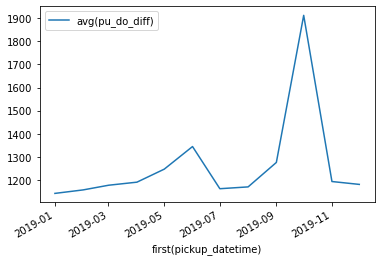

In [49]:
daytime_avg_df.plot(x='first(pickup_datetime)', y='avg(pu_do_diff)', kind='line')